In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

### Data Loading

In [34]:
df = pd.read_csv('StudentPerformance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### EDA

In [35]:
df.shape

(10000, 6)

In [36]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [38]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

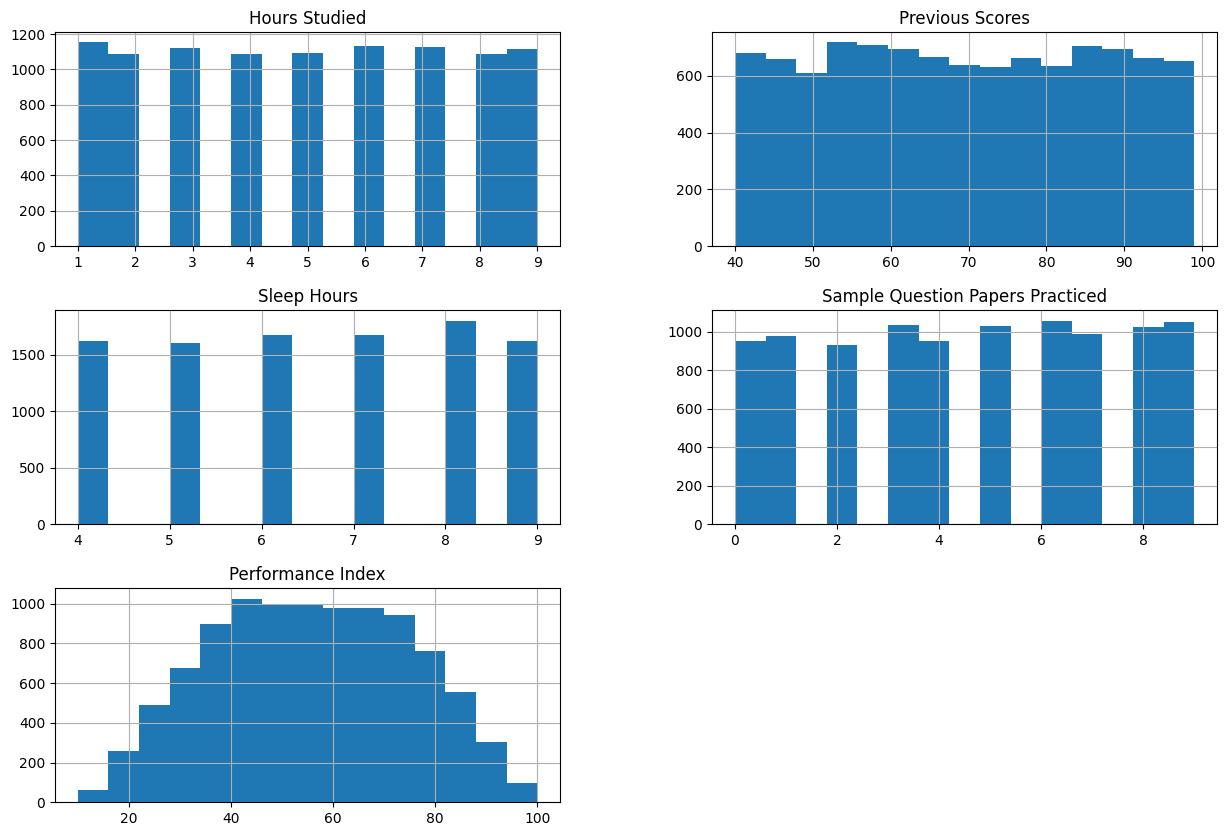

In [39]:
df.hist(column=numerical_columns, bins=15, figsize=(15, 10))

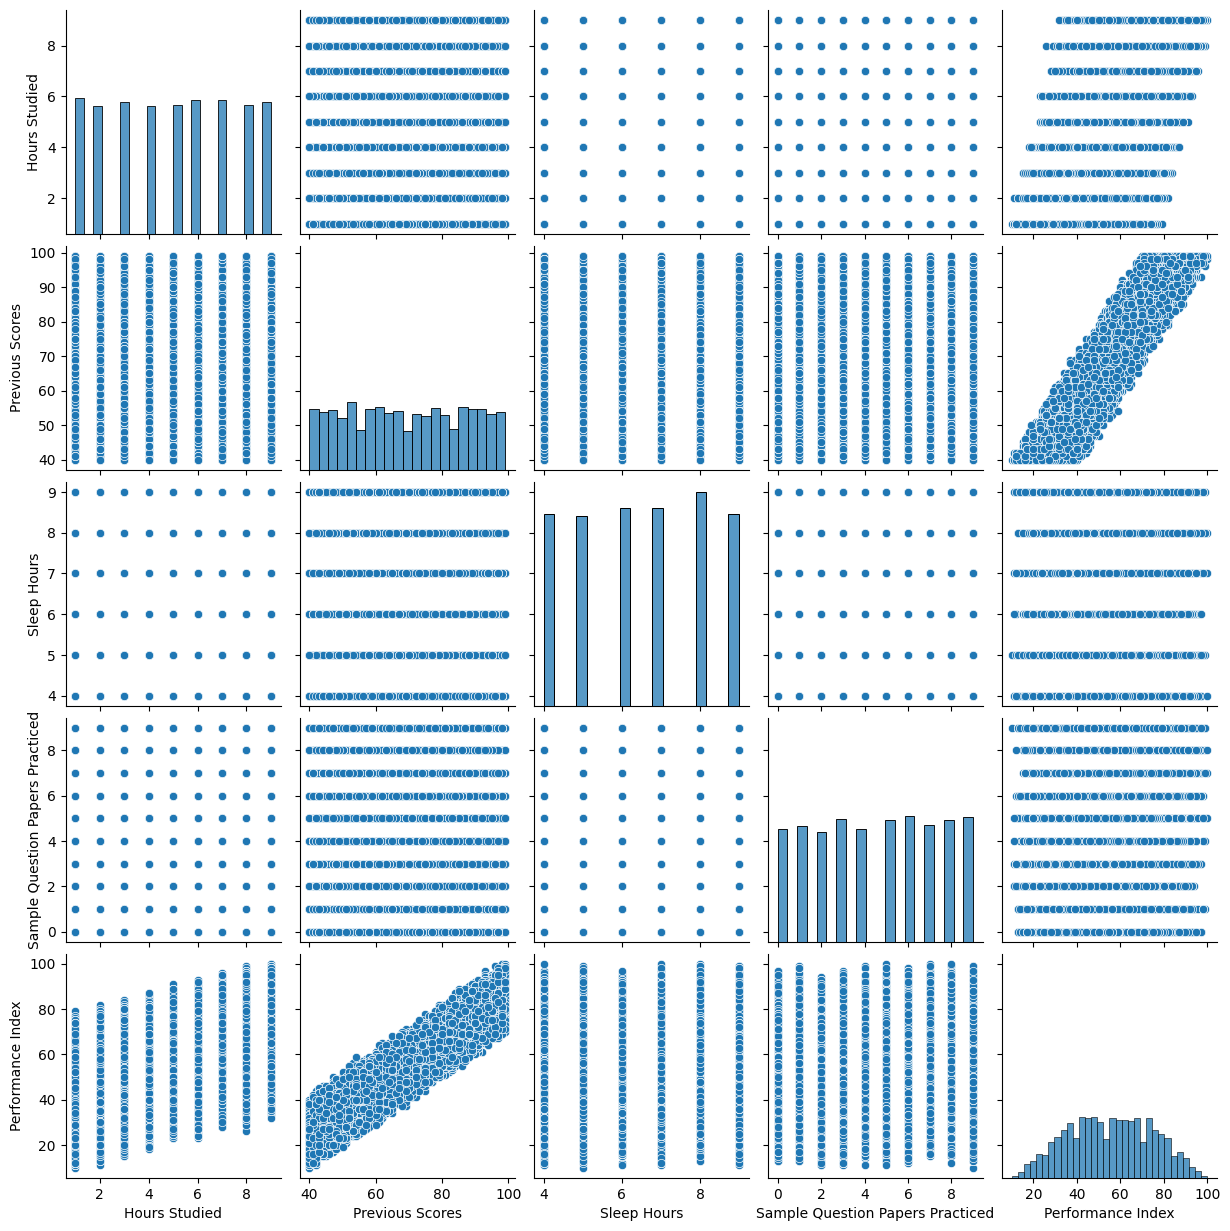

In [40]:
sns.pairplot(df[numerical_columns])

<Axes: >

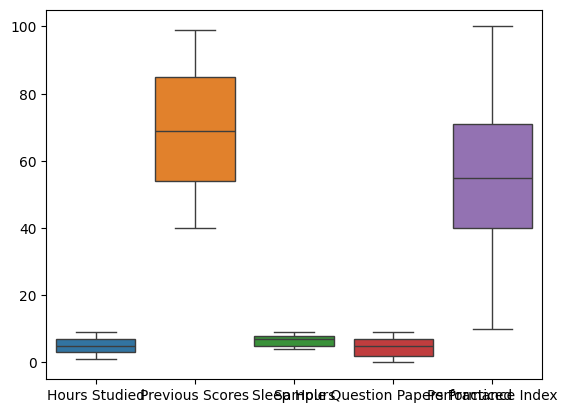

In [41]:
sns.boxplot(data=df[numerical_columns])

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

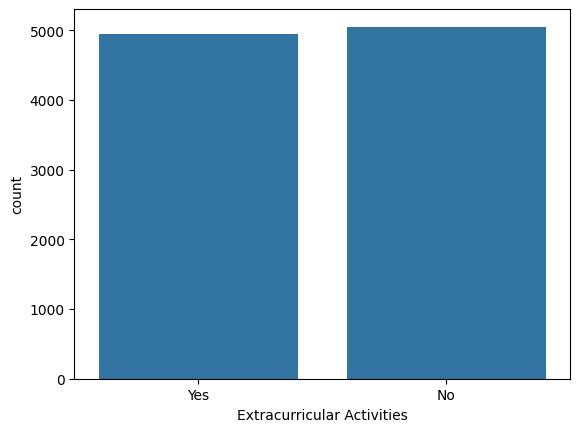

In [42]:
sns.countplot(x='Extracurricular Activities', data=df)

<Axes: >

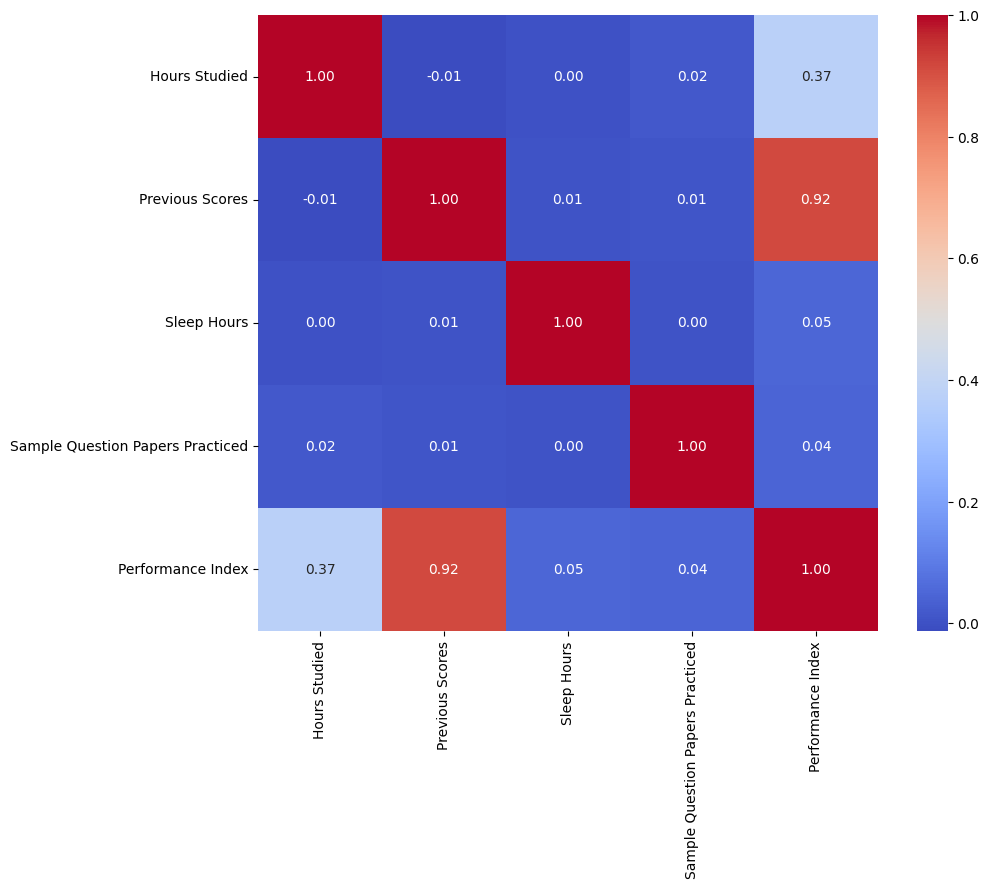

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')

### Preprocessing

#### Handling Missing Value

In [44]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

#### Handling Duplicate

In [45]:
df.duplicated().sum()

np.int64(127)

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

np.int64(0)

#### Encoding Categorical

In [48]:
lencoding = LabelEncoder()
df['Extracurricular Activities'] = lencoding.fit_transform(df['Extracurricular Activities'])

In [49]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#### Scaling

In [50]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Performance Index')

In [51]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [52]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,1.010078,1.454025,-1.249715,91.0
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925,65.0
2,1.161822,-1.064438,1.010078,0.275889,-0.900925,45.0
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925,36.0
4,0.775566,0.320865,-0.990022,0.864957,0.145444,66.0


#### Split

In [53]:
trainx, testx, trainy, testy = train_test_split(df.drop('Performance Index', axis=1), df['Performance Index'], test_size=0.3, random_state=42)

### Modelling

#### Linear Regression Model

In [54]:
linear_model = LinearRegression()
linear_model.fit(trainx, trainy)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
y_pred_linear = linear_model.predict(testx)
mae = mean_absolute_error(testy, y_pred_linear)
mse = mean_squared_error(testy, y_pred_linear)
r2 = r2_score(testy, y_pred_linear)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.6461997455341886
Mean Squared Error: 4.326180232071979
R^2 Score: 0.9881593003934889


#### Random Forest Model

In [56]:
rdm_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
rdm_forest_model.fit(trainx, trainy)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred_rdm_forest = rdm_forest_model.predict(testx)
mae = mean_absolute_error(testy, y_pred_rdm_forest)
mse = mean_squared_error(testy, y_pred_rdm_forest)
r2 = r2_score(testy, y_pred_rdm_forest)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.8941535682132407
Mean Squared Error: 5.640694048080885
R^2 Score: 0.9845614930001256


#### Gradient Boosting Regressor

In [58]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(trainx, trainy)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [59]:
y_pred_gbr = gbr.predict(testx)
mae = mean_absolute_error(testy, y_pred_gbr)
mse = mean_squared_error(testy, y_pred_gbr)
r2 = r2_score(testy, y_pred_gbr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.7023401416538182
Mean Squared Error: 4.630954675751882
R^2 Score: 0.98732513666434


### Save Model

In [60]:
joblib.dump(linear_model, 'model/model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(lencoding, 'model/label_encoder.pkl')

['model/label_encoder.pkl']